In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [50]:
key_path = '../service_account/gentle-keyword-423715-j0-03be08ad6412.json'

credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/bigquery"]
)

In [51]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project=credentials.project_id
)

In [80]:
idx_prod = 0

In [52]:
# Try if this connected

query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20160801`
LIMIT 5
"""

df = client.query(query).to_dataframe()
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   visitorId             0 non-null      Int64 
 1   visitNumber           5 non-null      Int64 
 2   visitId               5 non-null      Int64 
 3   visitStartTime        5 non-null      Int64 
 4   date                  5 non-null      object
 5   totals                5 non-null      object
 6   trafficSource         5 non-null      object
 7   device                5 non-null      object
 8   geoNetwork            5 non-null      object
 9   customDimensions      5 non-null      object
 10  hits                  5 non-null      object
 11  fullVisitorId         5 non-null      object
 12  userId                0 non-null      object
 13  channelGrouping       5 non-null      object
 14  socialEngagementType  5 non-null      object
dtypes: Int64(4), object(11)
memory usage: 752.0+

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,<NA>,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,<NA>,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,<NA>,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,<NA>,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,<NA>,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


In [53]:
# Create dataset reference
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')
# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

In [54]:
# Get format schema nested field

def format_schema_field(schema_field, indent=0):
    indent_str = "  " * indent
    field_info = f"{indent_str}{schema_field.name} ({schema_field.field_type})"
    
    if schema_field.mode != "NULLABLE":
        field_info += f" - {schema_field.mode}"
    
    if schema_field.description:
        field_info += f" - {schema_field.description}"
    
    nested_indent = indent + 2
    if schema_field.field_type == "RECORD":
        for sub_field in schema_field.fields:
            field_info += "\n" + format_schema_field(sub_field, nested_indent)
    
    return field_info


table_ref = dataset_ref.table('ga_sessions_20160801')
table = client.get_table(table_ref)

# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(format_schema_field(table.schema[5]))
print()

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(format_schema_field(table.schema[6]))
print()

print("\nSCHEMA field for the 'device' column:\n")
print(format_schema_field(table.schema[7]))
print()

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(format_schema_field(table.schema[8]))
print()

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(format_schema_field(table.schema[9]))
print()

print("\nSCHEMA field for the 'hits' column:\n")
print(format_schema_field(table.schema[10]))

SCHEMA field for the 'totals' column:

totals (RECORD)
    visits (INTEGER)
    hits (INTEGER)
    pageviews (INTEGER)
    timeOnSite (INTEGER)
    bounces (INTEGER)
    transactions (INTEGER)
    transactionRevenue (INTEGER)
    newVisits (INTEGER)
    screenviews (INTEGER)
    uniqueScreenviews (INTEGER)
    timeOnScreen (INTEGER)
    totalTransactionRevenue (INTEGER)
    sessionQualityDim (INTEGER)


SCHEMA field for the 'trafficSource' column:

trafficSource (RECORD)
    referralPath (STRING)
    campaign (STRING)
    source (STRING)
    medium (STRING)
    keyword (STRING)
    adContent (STRING)
    adwordsClickInfo (RECORD)
        campaignId (INTEGER)
        adGroupId (INTEGER)
        creativeId (INTEGER)
        criteriaId (INTEGER)
        page (INTEGER)
        slot (STRING)
        criteriaParameters (STRING)
        gclId (STRING)
        customerId (INTEGER)
        adNetworkType (STRING)
        targetingCriteria (RECORD)
            boomUserlistId (INTEGER)
        isV

In [55]:
anomaly = pd.read_csv("../result/anomaly_products.csv")['product'].values
tuple(anomaly)

("Google Men's 100% Cotton Short Sleeve Hero Tee White",
 'Google Rucksack',
 'Waterproof Backpack',
 'Google Laptop Backpack',
 'Google Alpine Style Backpack',
 'YouTube Twill Cap',
 'Google Laptop and Cell Phone Stickers',
 'YouTube Custom Decals',
 'Google Twill Cap',
 'Keyboard DOT Sticker',
 'Micro Wireless Earbud',
 'YouTube Leatherette Notebook Combo',
 'Electronics Accessory Pouch',
 'Recycled Mouse Pad')

In [56]:
tuple(anomaly)[idx_prod]

"Google Men's 100% Cotton Short Sleeve Hero Tee White"

In [57]:
query = f"""
SELECT 
  products.v2ProductName as product,
  date,
  SUM(totals.visits) as total_visits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` h,
    UNNEST(h.hits) hits,
    UNNEST(hits.product) products
WHERE 
  (_TABLE_SUFFIX BETWEEN '20160801' AND '20170801')
  AND
    (
      hits.eCommerceAction.action_type != '0'
      AND
      hits.eCommerceAction.action_type != '3'
      AND
      hits.eCommerceAction.action_type != '4'
    )
  AND
  (geoNetwork.country = 'United States')
  AND
  products.v2ProductName = "{tuple(anomaly)[idx_prod]}"
GROUP BY product, date
ORDER BY date 
"""

df = client.query(query).to_dataframe()
print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product       366 non-null    object
 1   date          366 non-null    object
 2   total_visits  366 non-null    Int64 
dtypes: Int64(1), object(2)
memory usage: 9.1+ KB
None


,product,date,total_visits
0,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160801,93
1,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160802,91
2,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160803,80
3,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160804,65
4,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160805,138
5,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160806,48
6,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160807,46
7,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160808,66
8,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160809,54
9,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160810,63


In [58]:
df = df.fillna(0)
df['date'] = pd.to_datetime(df['date'])
df['total_visits'] = df['total_visits'].astype('float')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product       366 non-null    object        
 1   date          366 non-null    datetime64[ns]
 2   total_visits  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.7+ KB
None


,product,date,total_visits
0,Google Men's 100% Cotton Short Sleeve Hero Tee...,2016-08-01,93.0
1,Google Men's 100% Cotton Short Sleeve Hero Tee...,2016-08-02,91.0
2,Google Men's 100% Cotton Short Sleeve Hero Tee...,2016-08-03,80.0
3,Google Men's 100% Cotton Short Sleeve Hero Tee...,2016-08-04,65.0
4,Google Men's 100% Cotton Short Sleeve Hero Tee...,2016-08-05,138.0


In [59]:
series = df.set_index('date')['total_visits']
series

date
2016-08-01     93.0
2016-08-02     91.0
2016-08-03     80.0
2016-08-04     65.0
2016-08-05    138.0
              ...  
2017-07-28    100.0
2017-07-29     43.0
2017-07-30     49.0
2017-07-31    110.0
2017-08-01     64.0
Name: total_visits, Length: 366, dtype: float64

In [60]:
# split dataset
train, test = series[series.index < pd.to_datetime('2017-04-01')], series[series.index > pd.to_datetime('2017-04-01')]
print('Number of dataset:{}'.format(len(train)))
print('Number of test: {}'.format(len(test)))

Number of dataset:243
Number of test: 122


In [61]:
# train, validation = dataset.iloc[:int(0.7 * len(train))], dataset.iloc[int(0.7 * len(dataset)):]
# print('Number of train:{}'.format(len(train)))
# print('Number of validation: {}'.format(len(validation)))

In [62]:
# EDA
train.describe()

count    243.000000
mean      56.176955
std       30.706380
min        4.000000
25%       33.500000
50%       50.000000
75%       72.500000
max      178.000000
Name: total_visits, dtype: float64

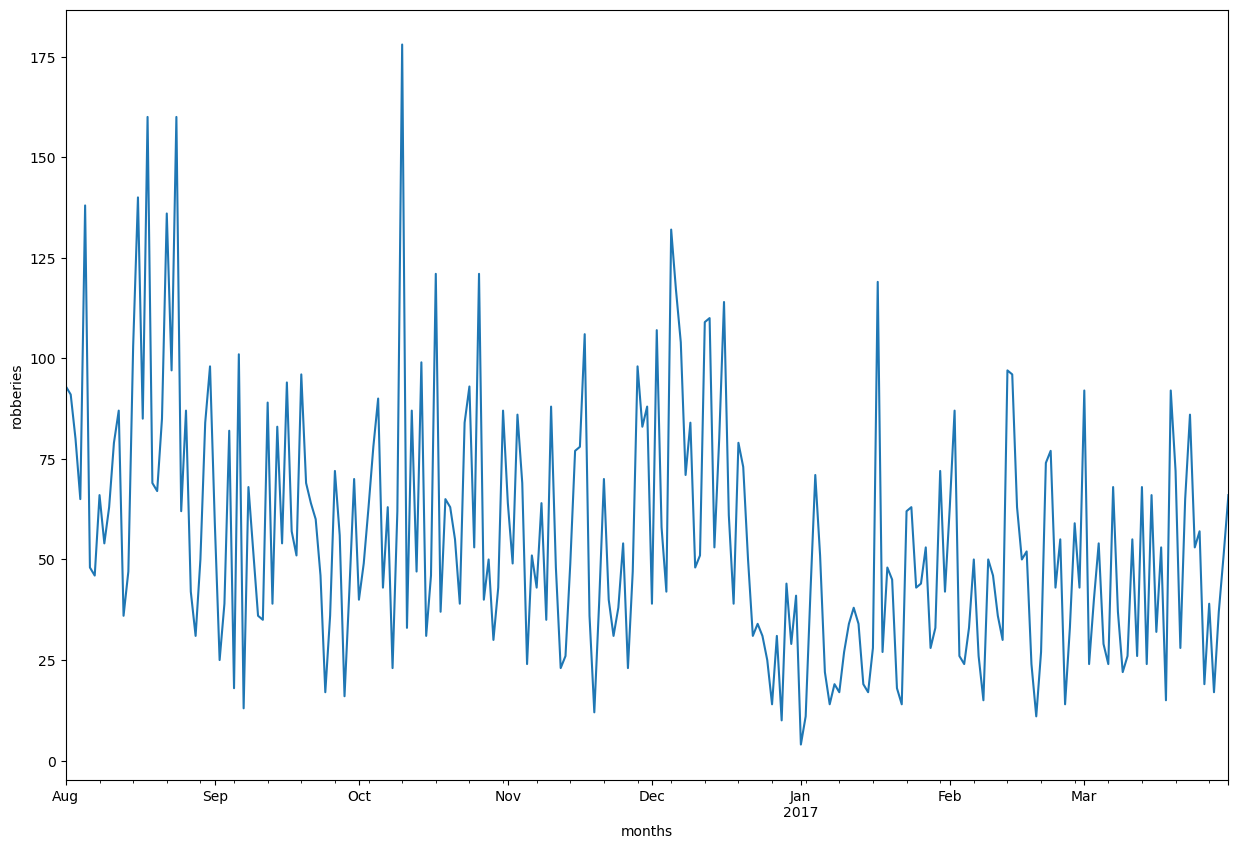

In [63]:
# Data Analysis (line plot)
plt.figure(figsize=(15,10))
train.plot()
plt.ylabel('robberies')
plt.xlabel('months')
plt.show()

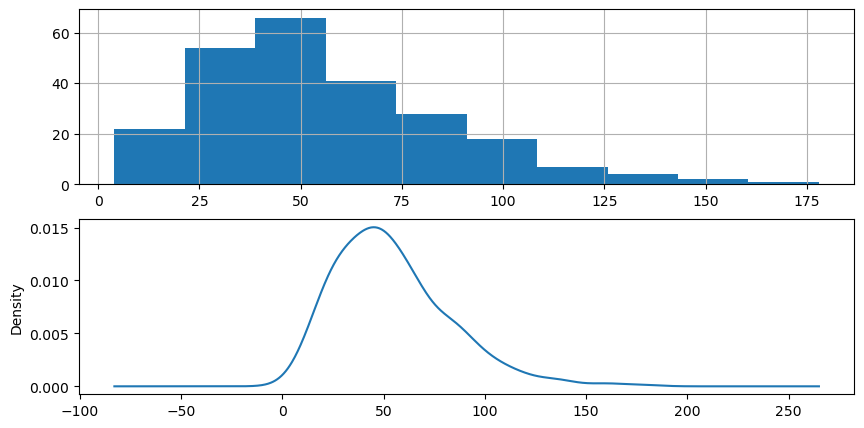

In [64]:
#density plot
plt.figure(figsize=(10,5))
plt.subplot(211)
train.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

In [65]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

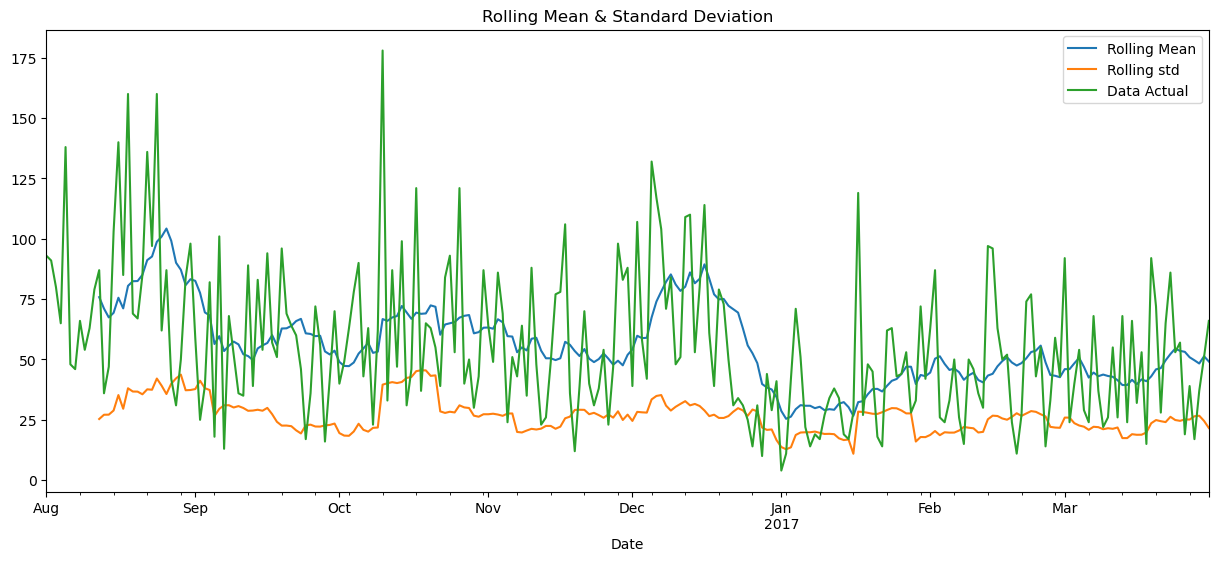

####################################################################################################
ADF Statistic: -3.005973
p-value: 0.034340
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
ADF < Critival Values
Reject null hypothesis, time series is stationary


In [66]:
def adfuller_test(y):
    # Plotting rolling statistics
    fig, ax = plt.subplots(figsize=(15, 6))
    y.rolling(12).mean().plot(ax=ax, label='Rolling Mean')
    y.rolling(12).std().plot(ax=ax, label='Rolling std')
    y.plot(ax=ax, label='Data Actual')
    plt.xlabel('Date')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show();
    
    print('#'*100)
    # Aduller test
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] > result[4]['5%']:
        print('ADF > Critical Values')
        print('Failed to reject null hypothesis, time series is non-stationary')
    else:
        print('ADF < Critival Values')
        print('Reject null hypothesis, time series is stationary')

adfuller_test(train)

In [67]:
import time
from sklearn.metrics import mean_absolute_error

p_params = range(0, 25, 8)
q_params = range(0, 3)

mae_grid = dict()
for p in p_params:
    mae_grid[p] = list()
    for q in q_params:
        order = (p, 0, q)
        start_time = time.time()
        model = ARIMA(train, order=order).fit()
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        y_pred = model.predict()
        mae = mean_absolute_error(train.iloc[24:], y_pred.iloc[24:])
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (0, 0, 0) in 0.04 seconds.
Trained ARIMA (0, 0, 1) in 0.04 seconds.
Trained ARIMA (0, 0, 2) in 0.07 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

Trained ARIMA (8, 0, 0) in 0.25 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No freq

Trained ARIMA (8, 0, 1) in 0.58 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (8, 0, 2) in 0.62 seconds.
Trained ARIMA (16, 0, 0) in 1.19 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (16, 0, 1) in 1.41 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No freq

Trained ARIMA (16, 0, 2) in 1.66 seconds.
Trained ARIMA (24, 0, 0) in 2.48 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (24, 0, 1) in 2.44 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (24, 0, 2) in 5.03 seconds.

{0: [23.021608744440744, 22.615373723458468, 22.488038869605845], 8: [20.71180162707996, 20.6266530729291, 20.74015869854517], 16: [20.14996147694864, 20.04724712948295, 20.030928958305037], 24: [19.592134280053713, 19.593332201636454, 19.56156653819313]}


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [68]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16,24
0,23.0216,20.7118,20.1500,19.5921
1,22.6154,20.6267,20.0472,19.5933
2,22.4880,20.7402,20.0309,19.5616


In [69]:
idx_min = mae_df.idxmin()
min_value = mae_df.min().min()
for c, r in zip(idx_min.index, idx_min.values):
    if mae_df.loc[r, c] == min_value:
        print(c, r)
        p_opt = c
        q_opt = r
 

24 2


In [70]:
model = ARIMA(train, order=(p_opt, 0, q_opt)).fit()
print(model.summary())

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:           total_visits   No. Observations:                  243
Model:                ARIMA(24, 0, 2)   Log Likelihood               -1136.323
Date:                Wed, 22 May 2024   AIC                           2328.646
Time:                        15:38:06   BIC                           2426.452
Sample:                    08-01-2016   HQIC                          2368.041
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.2888      6.357      8.855      0.000      43.830      68.748
ar.L1         -0.6916      0.828     -0.836      0.403      -2.314       0.930
ar.L2         -0.1902      0.596     -0.319      0.7

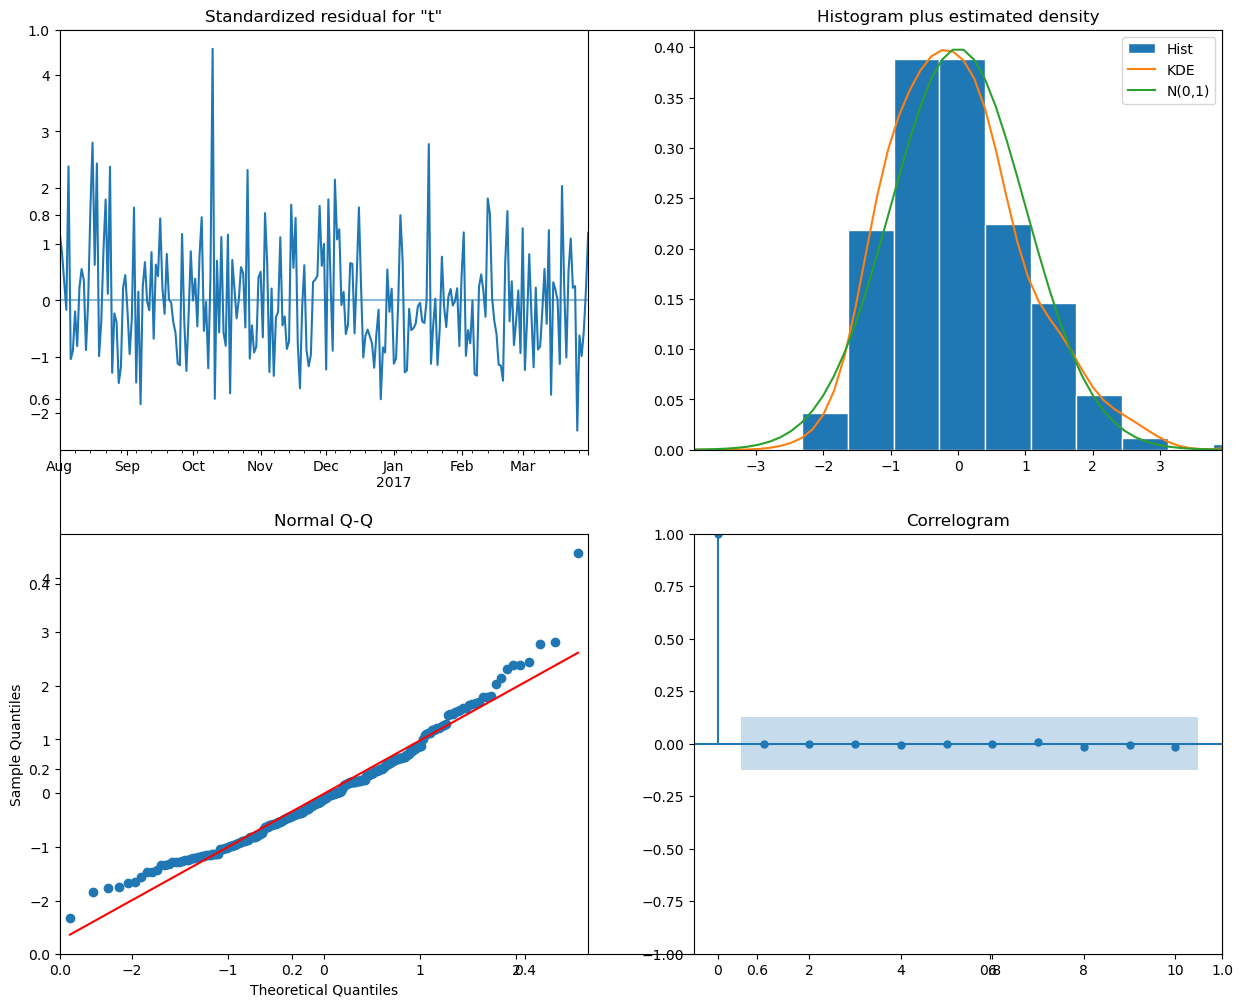

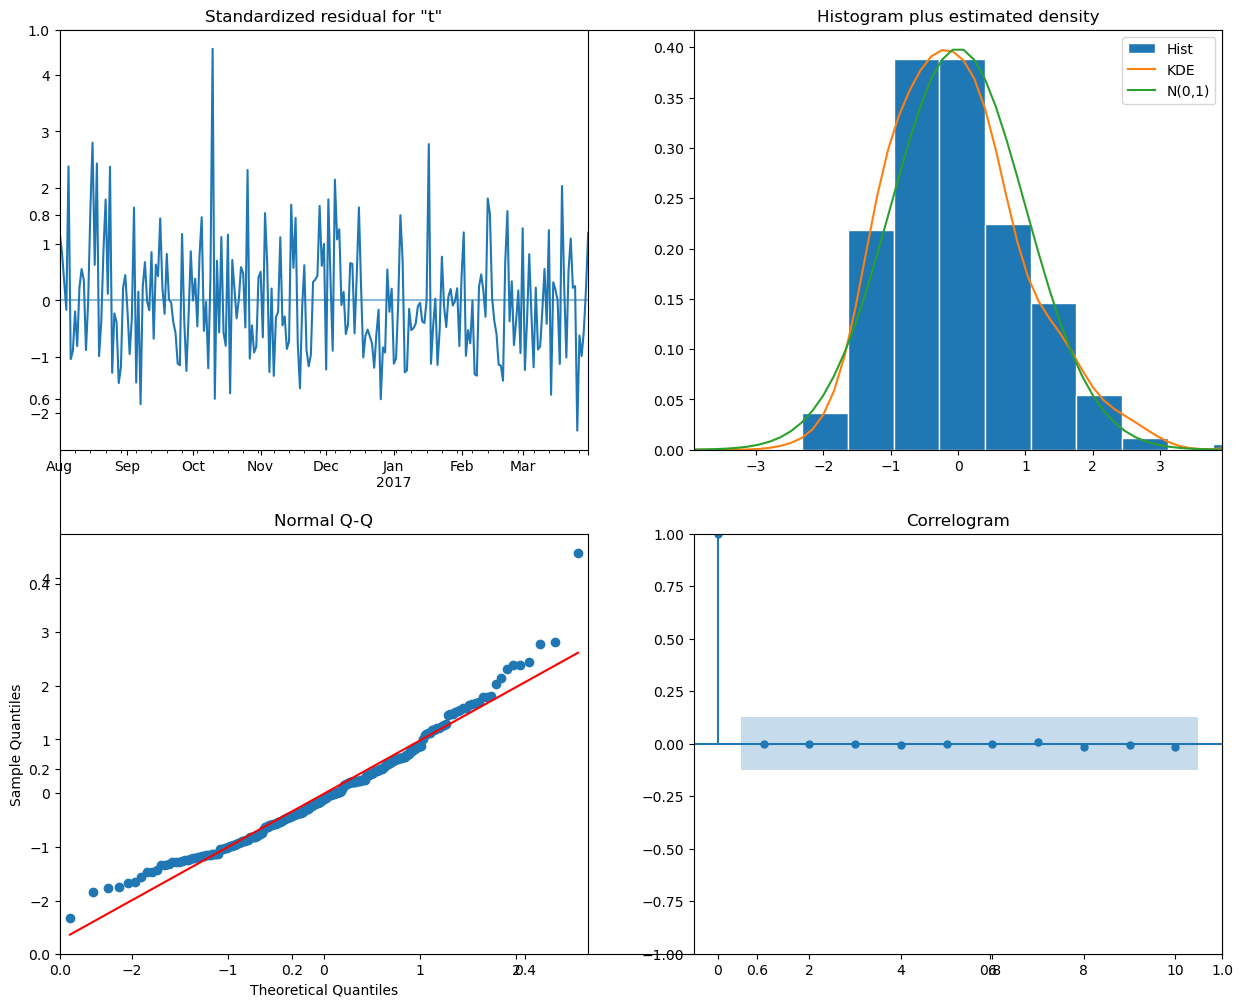

In [71]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

In [72]:
y_pred_wfv = pd.Series()
history = train.copy()
for i in range(len(test)):
    model = ARIMA(history, order=(p_opt, 0, q_opt)).fit()
    next_pred = model.forecast()
    next_period = test.index[i]
    pred_data = pd.Series(next_pred.iloc[0], index=[next_period])
    y_pred_wfv = pd.concat([y_pred_wfv, pred_data])
    tested_data = pd.Series([test[next_period]], index=[next_period])
    history = pd.concat([history, tested_data])
    history = history[1:]

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_16272\3840444066.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsm

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

In [73]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df_pred_test = pd.DataFrame({'y_test': test, 'y_pred_wfv': y_pred_wfv})
fig = px.line(df_pred_test, labels={'value': 'Total Visits'})
fig.show()

In [74]:
print(mean_absolute_error(test.resample('W').mean(), y_pred_wfv.resample('W').mean()))
df_pred_test

9.160636118751992


,y_test,y_pred_wfv
2017-04-02,23.0,57.158184
2017-04-03,59.0,43.951767
2017-04-04,52.0,40.838526
2017-04-05,53.0,45.895650
2017-04-06,59.0,53.444787
...,...,...
2017-07-28,100.0,66.185252
2017-07-29,43.0,63.904803
2017-07-30,49.0,60.047516
2017-07-31,110.0,47.176150


In [75]:
df_pred_test.resample('W').mean()

,y_test,y_pred_wfv
2017-04-02,23.000000,57.158184
2017-04-09,51.428571,50.983198
2017-04-16,45.714286,51.762654
2017-04-23,61.000000,54.908408
2017-04-30,37.285714,49.477154
2017-05-07,39.142857,44.226936
2017-05-14,36.428571,44.424982
2017-05-21,49.285714,46.308975
2017-05-28,36.857143,47.531199
2017-06-04,47.428571,46.744866


In [76]:
# Baseline
y_mean = test.mean()
y_baseline = y_mean + test * 0
print('y_mean ', y_mean)
print(mean_absolute_error(test.resample('W').mean(), y_baseline.resample('W').mean()))

y_mean  50.51639344262295
10.998829039812644


In [77]:
pd.DataFrame({'actual': series, 'y_pred_wfv': y_pred_wfv}).tail()

,actual,y_pred_wfv
2017-07-28,100.0,66.185252
2017-07-29,43.0,63.904803
2017-07-30,49.0,60.047516
2017-07-31,110.0,47.176150
2017-08-01,64.0,72.931981


In [78]:
result = pd.DataFrame({'actual': series, 'y_pred_wfv': y_pred_wfv})
result

,actual,y_pred_wfv
2016-08-01,93.0,NaN
2016-08-02,91.0,NaN
2016-08-03,80.0,NaN
2016-08-04,65.0,NaN
2016-08-05,138.0,NaN
...,...,...
2017-07-28,100.0,66.185252
2017-07-29,43.0,63.904803
2017-07-30,49.0,60.047516
2017-07-31,110.0,47.176150


In [79]:
result = result.reset_index(names=['date'])
result['product'] = tuple(anomaly)[idx_prod] * result.shape[0]
result.to_csv(f'../result/result-regression-{tuple(anomaly)[idx_prod]}.csv', index=False)